In [1]:
using NBInclude
@nbinclude("functions.ipynb")

All function imported


In [3]:
z_inco_list = load("../saved_data/MNIST_image_recovery_20_sigmoid.jld", "z_inco_list")
z_co_list = load("../saved_data/MNIST_image_recovery_20_sigmoid.jld", "z_co_list")

x_true_list = load("../saved_data/MNIST_image_recovery_20_sigmoid.jld", "x_true_list")
z_est_inco_matrix = load("../saved_data/MNIST_image_recovery_20_sigmoid.jld", "z_est_inco_matrix")
z_est_co_matrix = load("../saved_data/MNIST_image_recovery_20_sigmoid.jld", "z_est_co_matrix")
m_list = load("../saved_data/MNIST_image_recovery_20_sigmoid.jld", "m_list")


z_co_sig_list = load("../saved_data/MNIST_image_recovery_20_sigmoid.jld", "z_co_sig_list")
z_est_co_sig_matrix = load("../saved_data/MNIST_image_recovery_20_sigmoid.jld", "z_est_co_sig_matrix")


epoch_to_load_inco = 25
dir_inco = "../trained_GNN/MNIST_identity_v4"
encoder_μ_inco, encoder_logvar_inco, W1_inco, W2_inco, W3_inco, Q_inco = load_model_sep(dir_inco, epoch_to_load_inco);

# Load the model and test set loader unenforced
epoch_to_load_co = 25
dir_co = "../trained_GNN/MNIST_v2"
encoder_μ_co, encoder_logvar_co, W1_co, W2_co, W3_co, Q_co = load_model_sep(dir_co, epoch_to_load_co);

# Load the model and test set loader unenforced
epoch_to_load_co = 20
dir_co = "../trained_GNN/MNIST"
encoder_μ_co_sig, encoder_logvar_co_sig, decoder = load_model(dir_co, epoch_to_load_co);

#setup
x_dim = 784
k = 20
tolerance = 1e-7; max_iter = 5000; out_toggle = 0


# G_inco(z) = decoder_last * decoder(z)
G_inco(z) =Q_inco *W3_inco*relu(W2_inco*relu(W1_inco*z))
G_co(z) = Q_co*relu(W2_co*relu(W1_co*z));
G_co_sig(z) = sigmoid(Flux.params(decoder)[3]*relu(Flux.params(decoder)[2]*relu(Flux.params(decoder)[1]*z)));



Loading model...Done


Loading model...Done
Loading model...Done

┌ Info: Saved animation to 
│   fn = /var/folders/p2/smmnhqzd3blf_bqyb4fp8b5h0000gn/T/jl_wl65BV.gif
└ @ Plots /Users/babhru/.julia/packages/Plots/E2187/src/animation.jl:126


Plots.AnimatedGif("/var/folders/p2/smmnhqzd3blf_bqyb4fp8b5h0000gn/T/jl_wl65BV.gif")
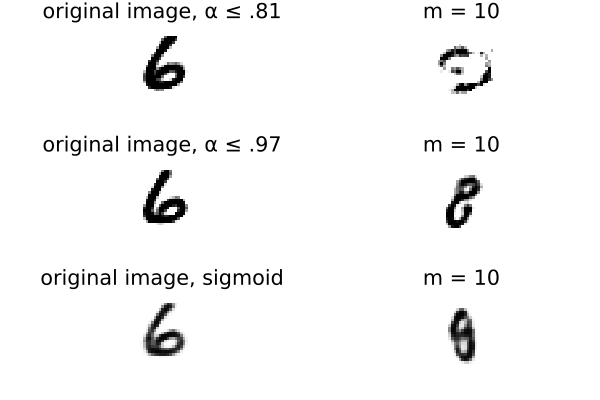

In [7]:
num = 6
z_inco = z_inco_list[num, :]
z_co = z_co_list[num, :]
z_co_sig = z_co_sig_list[num, :]

x_true = x_true_list[num, :]
z_est_inco_list = z_est_inco_matrix[num,:,:]
z_est_co_list = z_est_co_matrix[num,:,:]
z_est_co_sig_list = z_est_co_sig_matrix[num,:,:]

anim = @animate for k ∈ 1:length(m_list)
    p1 = plot(colorview(Gray, reshape(G_inco(z_inco), 28,28)' ), framestyle = :none, bg =:black, title = "original image, α ≤ .81")
    p2 = plot(colorview(Gray, reshape(G_inco(z_est_inco_list[:, k]), 28,28)' ), framestyle = :none, bg =:black, title = "m = $(m_list[k])")

    p3 = plot(colorview(Gray, reshape(G_co(z_co), 28,28)' ), framestyle = :none, bg =:black, title = "original image, α ≤ .97")
    p4 = plot(colorview(Gray, reshape(G_co(z_est_co_list[:, k]), 28,28)' ), framestyle = :none, bg =:black, title = "m = $(m_list[k])")

    p5 = plot(colorview(Gray, reshape(G_co_sig(z_co_sig), 28,28)' ), framestyle = :none, bg =:black, title = "original image, sigmoid")
    p6 = plot(colorview(Gray, reshape(G_co_sig(z_est_co_sig_list[:, k]), 28,28)' ), framestyle = :none, bg =:black, title = "m = $(m_list[k])")

    plot(p1, p2, p3, p4, p5, p6, layout = grid(3,2))
end
gif(anim, fps = 1)


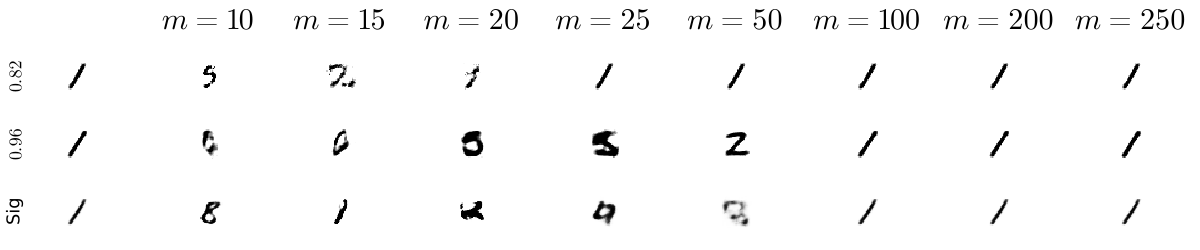

In [31]:

num = 1

z_inco = z_inco_list[num, :]
z_co = z_co_list[num, :]
x_true = x_true_list[num, :]
z_est_inco_list = z_est_inco_matrix[num,:,:]
z_est_co_list = z_est_co_matrix[num,:,:]
k = 10
nums = [1,4,5]
meas = [ 1, 2, 3, 4, 9, 10, 12 ,13]
p = [plot(colorview(Gray, reshape(G_inco(z_inco_list[num,:]), 28,28)' ),framestyle = :box,ylabelfontsize =12, axis=([], false), ylabel = L"0.82", leftmargin=10mm ) ]
q = [plot(colorview(Gray, reshape(G_co(z_co_list[num,:]), 28,28)' ),framestyle = :box, ylabelfontsize =12, axis=([], false), ylabel = L"0.96")]
r = [plot(colorview(Gray, reshape(G_co_sig(z_co_sig_list[num,:]), 28,28)' ),framestyle = :box, ylabelfontsize =12, axis=([], false), ylabel = "Sig")]

nums = [1,4,5]
meas = [ 1, 2, 3, 4, 9, 10, 12 ,13]
for index in 1:length(meas)
    m = meas[index]
    push!(p, plot(colorview(Gray, reshape(G_inco(z_est_inco_matrix[num,:, m]), 28,28)' ),framestyle = :none, titlefontsize	= 20, topmargin=10mm,title = L"m = %$(m_list[m])" )) #
    push!(q, plot(colorview(Gray, reshape(G_co(z_est_co_matrix[num,:, m]), 28,28)' ),framestyle = :none))
    push!(r, plot(colorview(Gray, reshape(G_co_sig(z_est_co_sig_matrix[num,:, m]), 28,28)' ),framestyle = :none))
end

plot1 = plot(p[1],p[2],p[3],p[4],p[5],p[6],p[7],p[8], p[9],
    q[1],q[2],q[3],q[4],q[5],q[6],q[7],q[8], q[9],
    r[1],r[2],r[3],r[4],r[5],r[6],r[7],r[8], r[9],
       layout = (3,9), size = (1200,250), rightmargin = 10mm)